# <center>Práctica 9</center>
## <center>Mejora y restauración de vídeo.</center>##

El objetivo de esta práctica es familiarizar al alumno con la utilización del filtrado interframe para
la mejora y restauración de vídeos en MATLAB, para ello se trabajará con el archivo rhinos.avi y
las funciones addnoise.m y tempNoiseFilter.m que acompañan al material de esta práctica

In [1]:
import numpy as np
import cv2
from bokeh.plotting import figure
from bokeh.io import output_notebook, show, push_notebook
import time
from matplotlib import pyplot as plt

import imfunctions as imf
import videofunctions as vidf
output_notebook()
%matplotlib notebook

Loading BokehJS ...

I. Mejora y Restauración de vídeo. Filtrado de promediado temporal.
Lea el archivo mthr_dotr.yuv utilizando la función readYUV. Utilice el comando hasFrame para
extraer los frames de la secuencia de vídeo. Vamos a realizar el filtrado en el espacio de color
RGB.
Reproduzca el vídeo.
2. ¿Tiene buena calidad? ¿se aprecia ruido?

In [8]:
vidcap = cv2.VideoCapture('grandma_qcif.y4m')
success,frame = vidcap.read()
fps = vidcap.get(cv2.CAP_PROP_FPS)
frame=cv2.cvtColor(frame, cv2.COLOR_BGR2RGBA) # because Bokeh expects a RGBA image
frame=cv2.flip(frame, -1) # because Bokeh flips vertically
width=frame.shape[1]
height=frame.shape[0]
p = figure(x_range=(0,width), y_range=(0,height), output_backend="webgl", width=width, height=height)
myImage = p.image_rgba(image=[frame], x=0, y=0, dw=width, dh=height)
show(p, notebook_handle=True)

while success:
    success,frame = vidcap.read()
    if not success:
        vidcap.release()
        break
    frame=cv2.cvtColor(frame, cv2.COLOR_BGR2RGBA)
    frame=cv2.flip(frame, -1)
    myImage.data_source.data['image']=[frame]
    push_notebook()
    time.sleep(1/fps)    
vidcap.release()    

guardar frames en lista
1. ¿Cuántos frames tiene la estructura mov?

In [3]:
vidcap = cv2.VideoCapture('grandma_qcif.y4m')
success,image = vidcap.read()
count = 0
frames = []
while success:
  frames.append(image)     # save frame as JPEG file      
  success,image = vidcap.read()
  #print('Read a new frame: ', success)
  count += 1
vidcap.release()

print(len(frames))

870


Va a contaminar la secuencia mov con ruido para comprobar después el funcionamiento dos
tipos de filtrado interframe sencillos. Para apreciar la degradación que se va a provocar,
extraiga el primer frame de la secuencia mov y cree dos nuevas imágenes, una contaminada
con ruido tipo “sal y pimienta” y otra con ruido de tipo gaussiano, utilice para ello la función
imnoise.
Represente las tres imágenes, la original, la contaminada con ruido “sal y pimienta” y la
contaminada con ruido gaussiano.

<IPython.core.display.Javascript object>


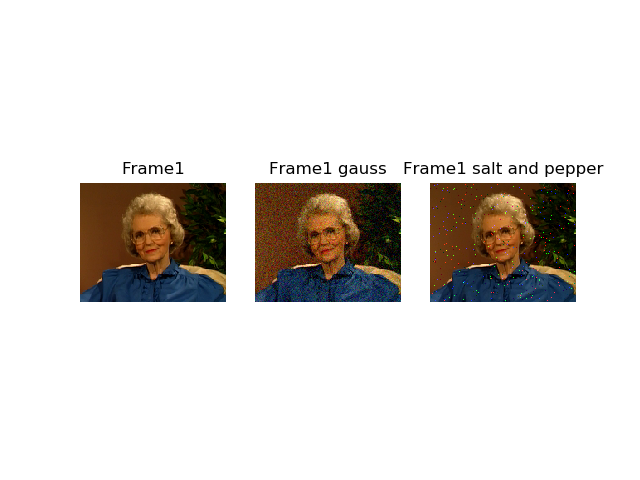

In [5]:
%matplotlib notebook
Frame1 = cv2.cvtColor(frames[0], cv2.COLOR_BGR2RGB)
Frame1gauss = imf.imnoise(Frame1,"gauss",[0,0.005])
Frame1sp = imf.imnoise(Frame1,'sandp',0.01)
plt.figure('gauss')
plt.subplot(131),plt.imshow(Frame1, vmin = 0, vmax = 255),plt.title('Frame1')
plt.xticks([]), plt.yticks([])
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.subplot(132),plt.imshow(Frame1gauss, vmin = 0, vmax = 255),plt.title('Frame1 gauss')
plt.xticks([]), plt.yticks([])
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.subplot(133),plt.imshow(Frame1sp, vmin = 0, vmax = 255),plt.title('Frame1 salt and pepper')
plt.xticks([]), plt.yticks([])
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

La función addnoise.m aplica ruido a los frames que se le indiquen como parámetro y
devuelve una nueva estructura de vídeo contaminada. Utilice esta función para obtener dos
nuevas estructuras de vídeo, una contaminada con ruido de tipo gaussiano y otra
contaminada con ruido de tipo sal y pimienta (en ambos casos introduzca ruido en todos los
frames de la secuencia mov). Reproduzca las secuencias resultantes.

In [6]:
vidf.addnoise('grandma_qcif.y4m', 'noisegrandma.avi', "sandp", [])

vidcap = cv2.VideoCapture('noisegrandma.avi')
success,frame = vidcap.read()
fps = vidcap.get(cv2.CAP_PROP_FPS)
frame=cv2.cvtColor(frame, cv2.COLOR_BGR2RGBA) # because Bokeh expects a RGBA image
frame=cv2.flip(frame, -1) # because Bokeh flips vertically
width=2*frame.shape[1]
height=2*frame.shape[0]
p = figure(x_range=(0,width), y_range=(0,height), output_backend="webgl", width=width, height=height)
myImage = p.image_rgba(image=[frame], x=0, y=0, dw=width, dh=height)
show(p, notebook_handle=True)

while success:
    success,frame = vidcap.read()
    if not success:
        vidcap.release()
        break
    frame=cv2.cvtColor(frame, cv2.COLOR_BGR2RGBA)
    frame=cv2.flip(frame, -1)
    myImage.data_source.data['image']=[frame]
    push_notebook()
    time.sleep(1/fps)    
vidcap.release()    

In [11]:
vidf.addnoise('grandma_qcif.y4m', 'gaussgrandma.avi', "gauss", [])

vidcap = cv2.VideoCapture('gaussgrandma.avi')
success,frame = vidcap.read()
fps = vidcap.get(cv2.CAP_PROP_FPS)
frame=cv2.cvtColor(frame, cv2.COLOR_BGR2RGBA) # because Bokeh expects a RGBA image
frame=cv2.flip(frame, -1) # because Bokeh flips vertically
width=2*frame.shape[1]
height=2*frame.shape[0]
p = figure(x_range=(0,width), y_range=(0,height), output_backend="webgl", width=width, height=height)
myImage = p.image_rgba(image=[frame], x=0, y=0, dw=width, dh=height)
show(p, notebook_handle=True)

while success:
    success,frame = vidcap.read()
    if not success:
        vidcap.release()
        break
    frame=cv2.cvtColor(frame, cv2.COLOR_BGR2RGBA)
    frame=cv2.flip(frame, -1)
    myImage.data_source.data['image']=[frame]
    push_notebook()
    time.sleep(1/fps)    
vidcap.release() 

La función tempNoiseFilter realiza el filtrado temporal de la secuencia de vídeo que
recibe como parámetro, promediando el número de frames que se le indiquen. El
promediado temporal se realiza asignando el mismo peso a todos los frames.
Filtre las secuencias contaminadas en el paso anterior utilizando 3 frames en el promediado.
Reproduzca las secuencias resultantes.

In [7]:
vidf.tempNoiseFilter('noisegrandma.avi', 'filteredgrandma.avi', 5)

vidcap = cv2.VideoCapture('filteredgrandma.avi')
success,frame = vidcap.read()
fps = vidcap.get(cv2.CAP_PROP_FPS)
frame=cv2.cvtColor(frame, cv2.COLOR_BGR2RGBA) # because Bokeh expects a RGBA image
frame=cv2.flip(frame, -1) # because Bokeh flips vertically
width=2*frame.shape[1]
height=2*frame.shape[0]
p = figure(x_range=(0,width), y_range=(0,height), output_backend="webgl", width=width, height=height)
myImage = p.image_rgba(image=[frame], x=0, y=0, dw=width, dh=height)
show(p, notebook_handle=True)

while success:
    success,frame = vidcap.read()
    if not success:
        vidcap.release()
        break
    frame=cv2.cvtColor(frame, cv2.COLOR_BGR2RGBA)
    frame=cv2.flip(frame, -1)
    myImage.data_source.data['image']=[frame]
    push_notebook()
    time.sleep(1/fps)    
vidcap.release()    

In [14]:
vidf.tempNoiseFilter('gaussgrandma.avi', 'gaussfilteredgrandma.avi', 5)

vidcap = cv2.VideoCapture('gaussfilteredgrandma.avi')
success,frame = vidcap.read()
fps = vidcap.get(cv2.CAP_PROP_FPS)
frame=cv2.cvtColor(frame, cv2.COLOR_BGR2RGBA) # because Bokeh expects a RGBA image
frame=cv2.flip(frame, -1) # because Bokeh flips vertically
width=2*frame.shape[1]
height=2*frame.shape[0]
p = figure(x_range=(0,width), y_range=(0,height), output_backend="webgl", width=width, height=height)
myImage = p.image_rgba(image=[frame], x=0, y=0, dw=width, dh=height)
show(p, notebook_handle=True)

while success:
    success,frame = vidcap.read()
    if not success:
        vidcap.release()
        break
    frame=cv2.cvtColor(frame, cv2.COLOR_BGR2RGBA)
    frame=cv2.flip(frame, -1)
    myImage.data_source.data['image']=[frame]
    push_notebook()
    time.sleep(1/fps)    
vidcap.release()    

3. ¿Por qué en los dos primeros frames no se ha eliminado nada de ruido? ¿qué se le
ocurre que se podría hacer para filtrar los primeros frames que quedan sin filtrar
en el filtrado temporal?
4. ¿Se ha conseguido eliminar el ruido en el resto de frames de la secuencia?

Aumente a 6 el número de frames que se utilizan para realizar el promediado temporal.
Ahora serán 5 los frames que se quedan sin filtrar al inicio de la secuencia.

5. ¿Cuál es el efecto de esta modificación en el filtrado del resto de la secuencia?
6. ¿Cuál es la diferencia, que provoca el aumento del número de frames en el
promediado, entre las zonas con y sin movimiento de la secuencia?

Para observar estas diferencias abra diferentes figuras para reproducir los vídeos
contaminado, filtrado con 3 frames de promediado y filtrado con 6 frames de
promediado. Una vez detenidos los vídeos puede comparar el último frame de
cada uno de los tres casos. Hágalo para el ruido gaussiano y para el ruido sal y
pimienta. Incluya como figuras en la memoria estos frames (6 frames en total).